In [20]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x


directory_1 = '/home/jin/data_CIV/'
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

# emit = np.arange(100,700,100)
# emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

# random_vel= [11.8,30,50,100,150]

emit = [1]
random_vel=[11.8]
C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952


# directory_1 = '/home/jin/data_jin/'

cc_k = c.to(u.km / u.s).value
V_K = 0
V_H = (C_IV_H/C_IV_K -1 ) * cc_k
def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)


def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2


def finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(max(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2

sigma_Lya, sigma_CIV, N_CIV_0 = CIV(1e5)
tau_0 = tau(sigma_CIV,total_N_c)

def down_resolution(dx,dy,pp):
    newx= np.array([])
    newy = np.array([])
    for ii in np.arange(0,len(dx)-pp , pp):
        xx = dx[ii:ii+pp].mean()
        yy = dy[ii:ii+pp].mean()
        newx = np.append(xx,newx)
        newy = np.append(yy,newy)
    return newx, newy 

3.39e+13


In [21]:
nu_K = c / C_IV_K
nu_H =c / C_IV_H

print(r'{:2e}'.format(nu_H))

1.933182e+13 m / s


In [22]:
check = 0
# emit = 1
for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand * 10)
                v_title = int(v_rand)
                index_v_ran = 1
            elif v_rand < 100 and v_rand > 15:
                v_title = int(v_rand * 10)
                index_v_ran = 1
            else:
                v_title = int(v_rand)
                index_v_ran = 2

            for nn, expand_v in enumerate(expand_vel):

                if expand_v == 0:
                    expand_title = '000'
                    index_expand = 0
                elif expand_v >= 1000:
                    expand_title = int(expand_v / 10)
                    index_expand = 3
                else:
                    expand_title = int(expand_v)
                    index_expand = 2

                for mm, emit_v in enumerate(emit):
                    if emit_v == 1 :
                        emit_title = 100
                        emit_index = 0
                    elif emit_v >= 1000:
                        emit_title = int(emit_v/10)
                        emit_index = 3 
                    elif emit_v < 100  and emit_v > 1:
                         emit_title = int(emit_v * 10)
                         emit_index = 1
                    else :
                        emit_title = emit_v
                        emit_index = 2

                    path_sp = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{index_expand}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_title}E+0{index_v_ran}spec_com.dat'
                    
                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        check += 1
                        continue
                    
                    # 데이터 처리 코드 실행
                    globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp
                    globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp[0]
                    globals()[f'tot_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp[1]

                    # K and H line separate
                    lam_c = (C_IV_K_A + C_IV_H_A) / 2
                    # K line
                    globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    globals()[f'tot_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    # H line
                    globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]
                    globals()[f'tot_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]



                    # K line double peak separate
                    if v_rand == 118:
                        Fraction =0.000014 #0.000018
                    else:
                        Fraction =0.000018  #0.000018
                    C_IV_K_P = C_IV_K_A +  C_IV_K_A*Fraction 
                    C_IV_K_N = C_IV_K_A  -  C_IV_K_A*Fraction 

                    X_K_P = globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P ].to_numpy()
                    X_K_N = globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N].to_numpy()
                    filtered_series_K_pos_1 = globals()[f'tot_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P ].to_numpy()
                    filtered_series_K_neg_1 = globals()[f'tot_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N].to_numpy()

                    tt_K = (globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N) | (globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P )

                    globals()[f'tot_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_K, globals()[f'tot_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])
                    globals()[f'tot_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_K, globals()[f'tot_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])

                        # H line double peak separate
                    C_IV_H_P = C_IV_H_A +  C_IV_H_A*Fraction 
                    C_IV_H_N = C_IV_H_A -  C_IV_H_A*Fraction 

                    X_H_P = globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P].to_numpy()
                    X_H_N = globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N].to_numpy()
                    filtered_series_H_pos_1 = globals()[f'tot_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P].to_numpy()
                    filtered_series_H_neg_1 = globals()[f'tot_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N].to_numpy()

                    tt_H = (globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N) | (globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P)

                    

                    globals()[f'tot_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_H, globals()[f'tot_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])
                    globals()[f'tot_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_H, globals()[f'tot_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])

                    globals()[f'tot_vx_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'tot_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) / C_IV_K_A) * cc_k
                    globals()[f'tot_vy_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

                    globals()[f'tot_vx_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'tot_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) / C_IV_K_A) * cc_k
                    globals()[f'tot_vy_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'tot_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

print(check)


0


In [23]:
check = 0
# emit = 1
for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand * 10)
                v_title = int(v_rand)
                index_v_ran = 1
            elif v_rand < 100 and v_rand > 15:
                v_title = int(v_rand * 10)
                index_v_ran = 1
            else:
                v_title = int(v_rand)
                index_v_ran = 2

            for nn, expand_v in enumerate(expand_vel):

                if expand_v == 0:
                    expand_title = '000'
                    index_expand = 0
                elif expand_v >= 1000:
                    expand_title = int(expand_v / 10)
                    index_expand = 3
                else:
                    expand_title = int(expand_v)
                    index_expand = 2

                for mm, emit_v in enumerate(emit):
                    if emit_v == 1 :
                        emit_title = 100
                        emit_index = 0
                    elif emit_v >= 1000:
                        emit_title = int(emit_v/10)
                        emit_index = 3 
                    elif emit_v < 100  and emit_v > 1:
                        emit_title = int(emit_v * 10)
                        emit_index = 1
                    else :
                        emit_title = emit_v
                        emit_index = 2

                    path_sp = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{index_expand}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_title}E+0{index_v_ran}spec_com.dat'

                
                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        check += 1
                        continue
                    
                    # 데이터 처리 코드 실행
                    globals()[f'data_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp
                    globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp[0]
                    globals()[f'halo_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = data_sp[2]

                    # K and H line separate
                    lam_c = (C_IV_K_A + C_IV_H_A) / 2
                    # K line
                    globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    globals()[f'halo_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= lam_c]
                    # H line
                    globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]
                    globals()[f'halo_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_sp_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_sp_dlam_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= lam_c]



                    # K line double peak separate
                    Fraction =0   #0.000018
                    C_IV_K_P = C_IV_K_A +  C_IV_K_A*Fraction 
                    C_IV_K_N = C_IV_K_A  -  C_IV_K_A*Fraction 

                    X_K_P = globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P ].to_numpy()
                    X_K_N = globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N].to_numpy()
                    filtered_series_K_pos_1 = globals()[f'halo_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P ].to_numpy()
                    filtered_series_K_neg_1 = globals()[f'halo_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N].to_numpy()

                    tt_K = (globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_K_N) | (globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_K_P )

                    globals()[f'halo_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_K, globals()[f'halo_lambda_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])
                    globals()[f'halo_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_K, globals()[f'halo_flux_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])

                        # H line double peak separate
                    C_IV_H_P = C_IV_H_A +  C_IV_H_A*Fraction 
                    C_IV_H_N = C_IV_H_A -  C_IV_H_A*Fraction 

                    X_H_P = globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P].to_numpy()
                    X_H_N = globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N].to_numpy()
                    filtered_series_H_pos_1 = globals()[f'halo_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P].to_numpy()
                    filtered_series_H_neg_1 = globals()[f'halo_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N].to_numpy()

                    tt_H = (globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] <= C_IV_H_N) | (globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] >= C_IV_H_P)

                    

                    globals()[f'halo_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_H, globals()[f'halo_lambda_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])
                    globals()[f'halo_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = np.compress(tt_H, globals()[f'halo_flux_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'])

                    globals()[f'halo_vx_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'halo_x_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) / C_IV_K_A) * cc_k
                    globals()[f'halo_vy_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_y_K_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

                    globals()[f'halo_vx_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = ((globals()[f'halo_x_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] - C_IV_K_A) / C_IV_K_A) * cc_k
                    globals()[f'halo_vy_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'halo_y_H_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']

print(check)


0


K line

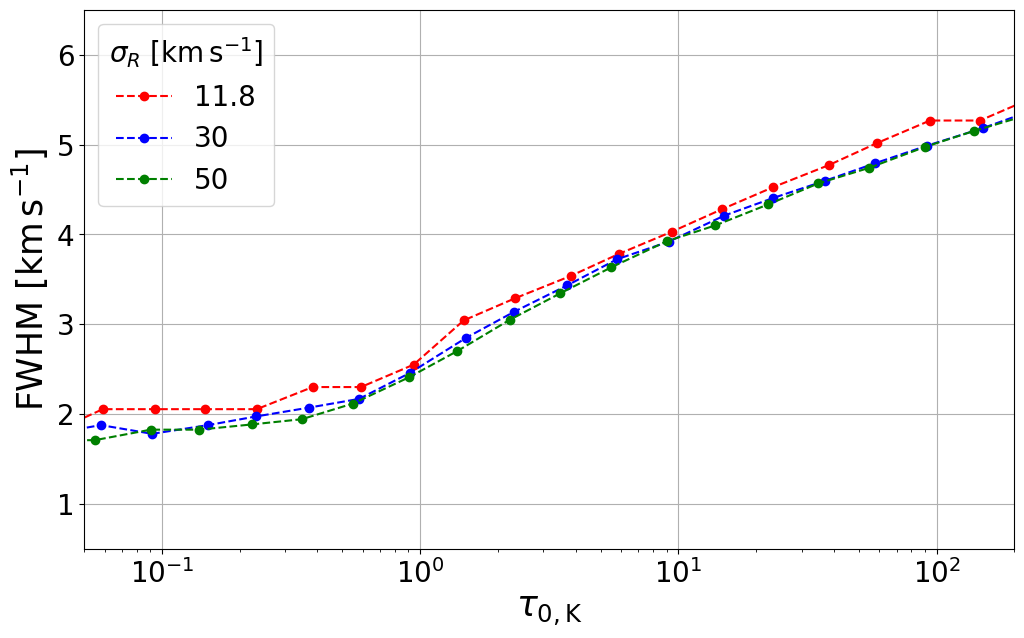

In [24]:
fig = plt.figure(1,figsize=(12,7))
import math
vel_0, expand = 11.8 , 0
emit = 1


vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))


vel = 11.8
plt.plot(tau_0, (K_FWHM) / vel ,'ro--',label=f'{vel}')

vel = 30
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0/(vel/vel_0),K_FWHM / vel ,'bo--',label=f'{vel}')




vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),K_FWHM/vel,'go--',label=f'{vel}')

plt.xscale('log')
# plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~ [\rm km\,s^{-1}]$',fontsize=25)
# plt.legend(fontsize=20,ncol=2,title=f'tot_$\sigma_{{R}} = {vel/10} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.05,200)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0.5,6.5)
plt.grid(True)
plt.legend(loc='upper left',fontsize = 20,ncol=1,title = r'$\sigma_R ~ [\rm km \, s^{-1}]$',title_fontsize=20)

# plt.ylim(0,500)
# plt.axhline(y = 4*35*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='-.',color='b')
# plt.axhline(y = 4*11.8*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='-.',color='r')
# plt.axhline(y = 4*57*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='-.',color='g')
# plt.axvline(x= 3.2 , ymin=-10,ymax=5e3,linestyle='-.',color='k')
# print((np.log(np.e)))
# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_K_tot_with_broadening_factor.png',bbox_inches='tight')

In [61]:
def K_FWHM_Func(vel):
    expand = 0
    emit = 1
    blue_K = np.zeros(len(total_N_c))
    K_FWHM = np.copy(blue_K)
    for ii, N_civ in enumerate(total_N_c):
        index = math.floor(math.log10(N_civ))
        atom_n = int(N_civ/ 10**index * 10)
        if vel == 11.8:
            vel_k = 118
        else : vel_k = vel
        K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    return K_FWHM 

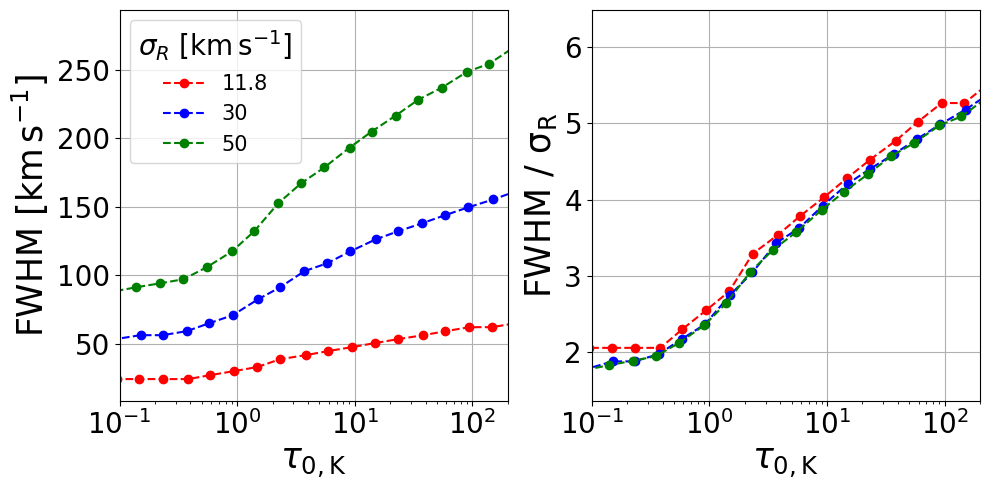

In [96]:
fig = plt.figure(1,figsize=(10,5))

vel_0, expand = 11.8 , 0
emit = 1

plt.subplot(121)

vel = 11.8
K_FWHM = K_FWHM_Func(vel)
plt.plot(tau_0, (K_FWHM)  ,'ro--',label=f'{vel}')

vel = 30
K_FWHM = K_FWHM_Func(vel)
plt.plot(tau_0/(vel/vel_0),K_FWHM ,'bo--',label=f'{vel}')

vel = 50
K_FWHM = K_FWHM_Func(vel)
plt.plot(tau_0/(vel/vel_0),K_FWHM,'go--',label=f'{vel}')


plt.xscale('log')
# plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~ [\rm km\,s^{-1}]$',fontsize=25)
# plt.legend(fontsize=20,ncol=2,title=f'tot_$\sigma_{{R}} = {vel/10} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.1,2e2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0.5,6.5)
plt.grid(True)
plt.legend(loc='upper left',fontsize = 15,ncol=1,title = r'$\sigma_R ~ [\rm km \, s^{-1}]$',title_fontsize=20)
plt.tight_layout()

plt.subplot(122)

vel = 11.8
factor = vel 
K_FWHM = K_FWHM_Func(vel)
plt.plot(tau_0, (K_FWHM) /factor   ,'ro--',label=f'{vel}')

vel = 30
factor = vel
K_FWHM = K_FWHM_Func(vel)
plt.plot(tau_0/(vel/vel_0), (K_FWHM) /factor   ,'bo--',label=f'{vel}')

vel = 50
factor = vel
K_FWHM = K_FWHM_Func(vel)
plt.plot(tau_0/(vel/vel_0), (K_FWHM) /factor   ,'go--',label=f'{vel}')

plt.xscale('log')
# plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~/~ \sigma_R$',fontsize=25)
# plt.legend(fontsize=20,ncol=2,title=f'tot_$\sigma_{{R}} = {vel/10} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.1,2e2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0.5,6.5)
plt.grid(True)
# plt.legend(loc='upper left',fontsize = 20,ncol=1,title = r'$\sigma_R ~ [\rm km \, s^{-1}]$',title_fontsize=20)
plt.tight_layout()
plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_K_tot_two_1.pdf',bbox_inches='tight')

FWHM = 2

In [52]:
def K_FWHM(NN,vel):
    expand = 0
    emit = 1
    vel = 11.8
    blue_K = np.zeros(len(total_N_c))
    K_FWHM = np.copy(blue_K)
    H_FWHM = np.copy(blue_K)
    T_FWHM = np.copy(blue_K)
    for ii, N_civ in enumerate(total_N_c):
        index = math.floor(math.log10(N_civ))
        atom_n = int(N_civ/ 10**index * 10)
        if vel == 11.8:
            vel_k = 118
        else : vel_k = vel
        K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    return K_FWHM

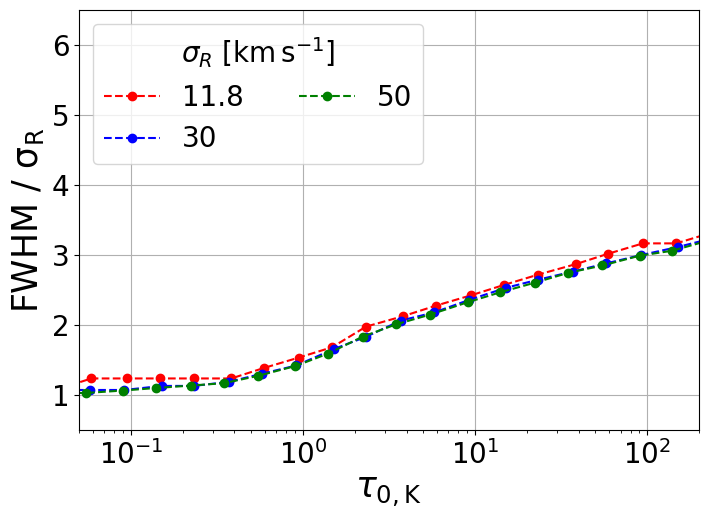

In [51]:
fig = plt.figure(1,figsize=(8,12))



plt.subplot(122)
vel_0, expand = 11.8 , 0
emit = 1

no = 1
vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0, (K_FWHM) /(vel*2*np.sqrt(2/no *np.log(2))),'ro--',label=f'{vel}')

vel = 30
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0/(vel/vel_0),K_FWHM /(vel*2*np.sqrt(2/no *np.log(2)))  ,'bo--',label=f'{vel}')




vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

plt.xscale('log')
plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~/~ {\sigma_R}$',fontsize=25)
plt.xlim(0.05,2e2)
plt.xticks(fontsize=20)
plt.yticks([1,2,3,4,5,6],fontsize=20)
plt.ylim(0.5,6.5)
plt.grid(True)
plt.legend(loc='upper left',fontsize = 20,ncol=2,title = r'$\sigma_R ~ [\rm km \, s^{-1}]$',title_fontsize=20)

# plt.ylim(0,500)
# plt.axhline(y = 2 ,xmin=0,xmax=1,linestyle='-.',color='k')

# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_K_ToT_1.pdf',bbox_inches='tight')

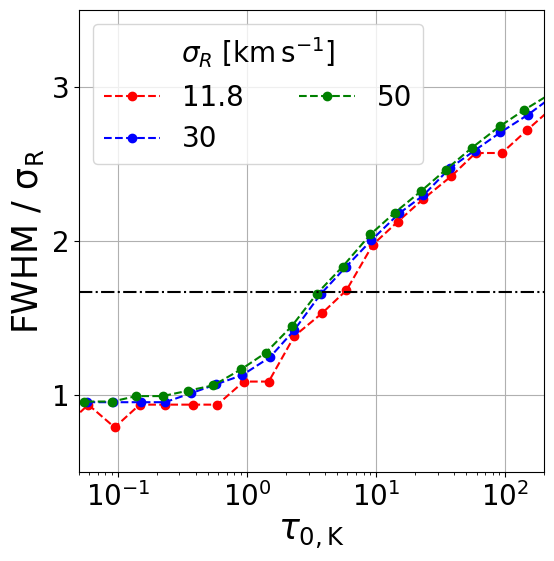

In [72]:
fig = plt.figure(1,figsize=(6,6))



# plt.subplot(121)
vel_0, expand = 11.8 , 0
emit = 1

no = 2
vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0, H_FWHM/(vel*2*np.sqrt(2/no *np.log(2))) ,'ro--',label=f'{vel}')

vel = 30
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0/(vel/vel_0),H_FWHM/(vel*2*np.sqrt(2/no *np.log(2)))   ,'bo--',label=f'{vel}')




vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),H_FWHM/(vel*2*np.sqrt(2/no *np.log(2))) ,'go--',label=f'{vel}')


# vel = 150
# import math
# blue_K = np.zeros(len(total_N_c))
# red_K = np.copy(blue_K)
# blue_H = np.copy(blue_K)
# red_H = np.copy(blue_K)

# K_FWHM = np.copy(blue_K)
# H_FWHM = np.copy(blue_K)
# T_FWHM = np.copy(blue_K)
# for ii, N_civ in enumerate(total_N_c):
#     index = math.floor(math.log10(N_civ))
#     atom_n = int(N_civ/ 10**index * 10)
#     if vel == 11.8:
#         vel_k = 118
#     else : vel_k = vel
#     # print(vel)
#     K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
#     H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



# plt.plot(tau_0/(vel/vel_0),K_FWHM/vel ,'ko--',label=f'{vel}')
#/vel/(2*np.sqrt(np.log(2))
# plt.plot(total_N_c,H_FWHM,'ro-',label='H line')
plt.xscale('log')
# plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~/~ {\sigma_R}$',fontsize=25)
# plt.legend(fontsize=20,ncol=2,title=f'halo_$\sigma_{{R}} = {vel/10} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.05,2e2)
plt.xticks(fontsize=20)
plt.yticks([1,2,3,4,5,6],fontsize=20)
plt.ylim(0.5,3.5)
plt.grid(True)
plt.legend(loc='upper left',fontsize = 20,ncol=2,title = r'$\sigma_R ~ [\rm km \, s^{-1}]$',title_fontsize=20)

# plt.ylim(0,500)
plt.axhline(y = 2*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='-.',color='k')





# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_K_halo.pdf',bbox_inches='tight')

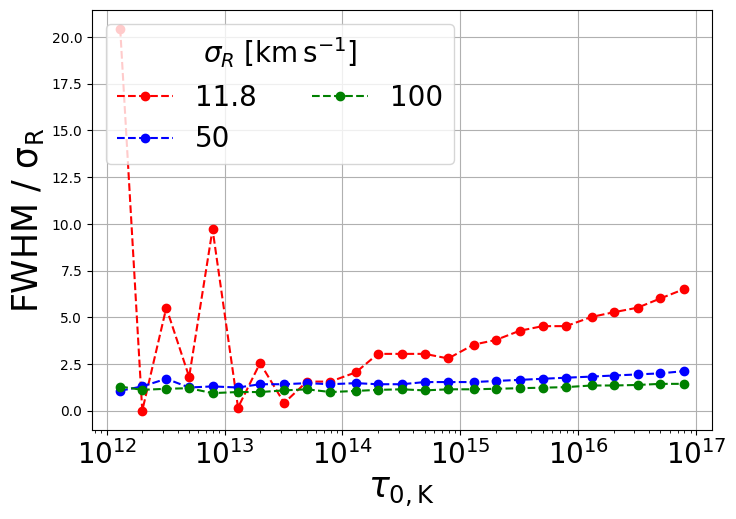

In [27]:
fig = plt.figure(1,figsize=(8,12))



plt.subplot(212)
vel_0, expand = 11.8 , 300
emit = 1
vel = 11.8

emit = 1
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(total_N_c, (H_FWHM) /vel,'ro--',label=f'{vel}')

emit = 50
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(total_N_c,H_FWHM /emit  ,'bo--',label=f'{emit}')



emit = 100
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(total_N_c,H_FWHM/emit  ,'go--',label=f'{emit}')


# vel = 150
# import math
# blue_K = np.zeros(len(total_N_c))
# red_K = np.copy(blue_K)
# blue_H = np.copy(blue_K)
# red_H = np.copy(blue_K)

# K_FWHM = np.copy(blue_K)
# H_FWHM = np.copy(blue_K)
# T_FWHM = np.copy(blue_K)
# for ii, N_civ in enumerate(total_N_c):
#     index = math.floor(math.log10(N_civ))
#     atom_n = int(N_civ/ 10**index * 10)
#     if vel == 11.8:
#         vel_k = 118
#     else : vel_k = vel
#     # print(vel)
#     K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
#     H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



# plt.plot(tau_0/(vel/vel_0),K_FWHM/vel ,'ko--',label=f'{vel}')
#/vel/(2*np.sqrt(np.log(2))
# plt.plot(total_N_c,H_FWHM,'ro-',label='H line')
plt.xscale('log')
# plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~/~ {\sigma_R}$',fontsize=25)
# plt.legend(fontsize=20,ncol=2,title=f'halo_$\sigma_{{R}} = {vel/10} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
# plt.xlim(0.05,2e2)
plt.xticks(fontsize=20)
# plt.yticks([1,2,3,4,5,6],fontsize=20)
# plt.ylim(0.5,6.5)
plt.grid(True)
plt.legend(loc='upper left',fontsize = 20,ncol=2,title = r'$\sigma_R ~ [\rm km \, s^{-1}]$',title_fontsize=20)

# plt.ylim(0,500)
# plt.axhline(y = 2*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='-.',color='k')

# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_K_halo.pdf',bbox_inches='tight')

H line

In [28]:
def CIV_H(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (f_CIV_H / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_CIV, N_CIV_0

sig_H, N_CIV_0_H = CIV_H(1e5)
print("{:.2e}".format(N_CIV_0_H))

def tau(sig_c, x):
    return sig_c * x


tau_0_H = tau(sig_H,total_N_c)

6.77e+13


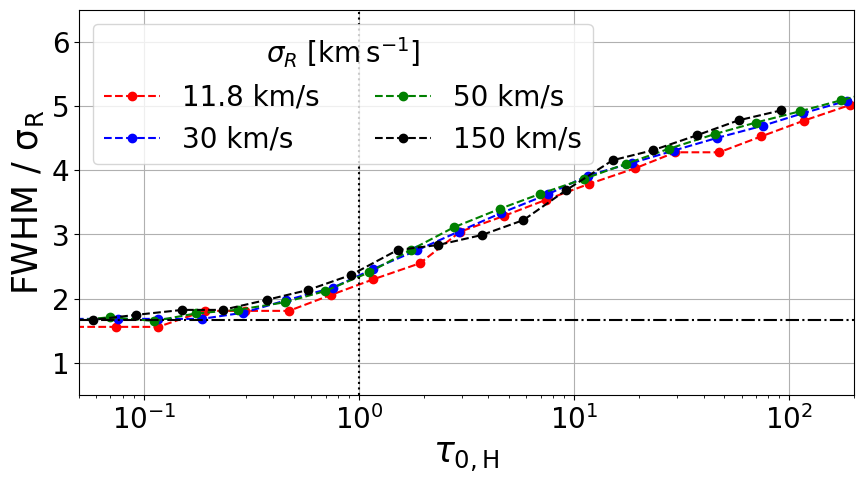

In [29]:
import math
vel_0, expand = 11.8 , 0
emit = 1


vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0_H, (H_FWHM) /vel ,'ro--',label=f'{vel} km/s')

vel = 30
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0_H/(vel/vel_0),H_FWHM /vel  ,'bo--',label=f'{vel} km/s')




vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0_H/(vel/vel_0),H_FWHM/vel   ,'go--',label=f'{vel} km/s')


vel = 150
import math
# total_N_c_1 = np.logspace(12,17,len(H_FWHM))
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    # print(vel)

    yy_H = globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']
    xx_H = globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}']

    yy_new_H = np.array([])
    xx_new_H = np.array([])

    yy_K = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']
    xx_K = globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']

    yy_new_K = np.array([])
    xx_new_K = np.array([])

    pp = 4

    for jj in np.arange(0,len(yy_H)-2*pp,pp):
        x = xx_H[jj:jj+pp].mean()
        xx_new_H = np.append(x,xx_new_H)
        y = yy_H[jj:jj+pp].mean()
        yy_new_H = np.append(y,yy_new_H)

    for jj in np.arange(0,len(yy_K)-2*pp,pp):
        x1 = xx_K[jj:jj+pp].mean()
        xx_new_K = np.append(x1,xx_new_K)
        y1 = yy_K[jj:jj+pp].mean()
        yy_new_K = np.append(y1,yy_new_K)

    # print(len(xx_new_K) , len(yy_new_K))
    K_FWHM[ii] = finding_FWHM_K(xx_new_K,yy_new_K,V_K)
    H_FWHM[ii] = finding_FWHM_H(xx_new_H,yy_new_H,V_H) 


# total_N_c_1 = np.logspace(12,17,len(H_FWHM))

# tau_0_H_1 = tau(sigma_CIV,total_N_c_1)
plt.plot(tau_0_H/(vel/vel_0),H_FWHM/vel ,'ko--',label=f'{vel} km/s')
#/vel/(2*np.sqrt(2*np.log(2))
# plt.plot(total_N_c,H_FWHM,'ro-',label='H line')
plt.xscale('log')
plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
plt.xlabel(r'$\tau_{0,\rm H}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~/~ { \sigma_R}$',fontsize=25)
# plt.legend(fontsize=20,ncol=2,title=f'tot_$\sigma_{{R}} = {vel/10} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.05,2e2)
plt.xticks(fontsize=20)
plt.yticks([1,2,3,4,5,6],fontsize=20)
plt.ylim(0.5,6.5)
plt.grid(True)
plt.legend(loc='upper left',fontsize = 20,ncol=2,title = r'$\sigma_R ~[\rm km \, s^{-1}]$',title_fontsize=20)
plt.axhline(y = 2*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='-.',color='k')
# plt.ylim(0,500)


# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_H.pdf',bbox_inches='tight')

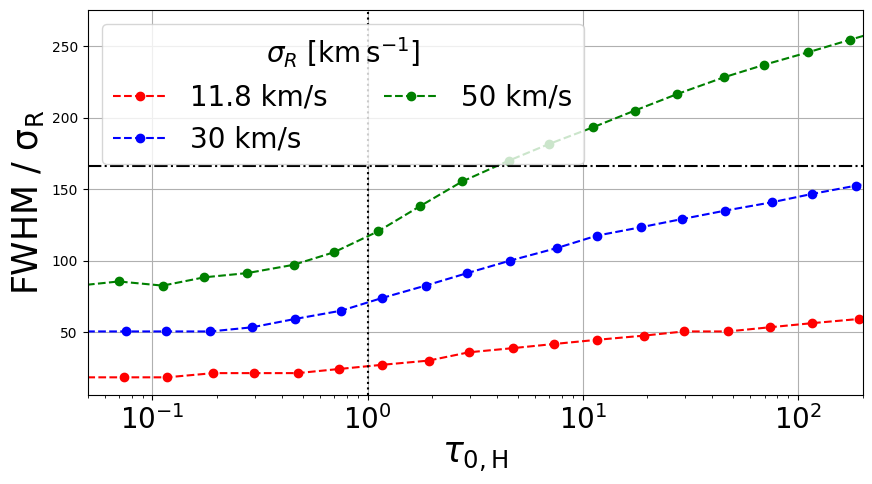

In [30]:
import math
vel_0, expand = 11.8 , 0
emit = 1


vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0_H, (H_FWHM) ,'ro--',label=f'{vel} km/s')

vel = 30
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0_H/(vel/vel_0),H_FWHM ,'bo--',label=f'{vel} km/s')




vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0_H/(vel/vel_0),H_FWHM  ,'go--',label=f'{vel} km/s')


plt.xscale('log')
plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
plt.xlabel(r'$\tau_{0,\rm H}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~/~ { \sigma_R}$',fontsize=25)
# plt.legend(fontsize=20,ncol=2,title=f'tot_$\sigma_{{R}} = {vel/10} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.05,2e2)
plt.xticks(fontsize=20)
# plt.yticks([1,2,3,4,5,6],fontsize=20)
# plt.ylim(0.5,6.5)
plt.grid(True)
plt.legend(loc='upper left',fontsize = 20,ncol=2,title = r'$\sigma_R ~[\rm km \, s^{-1}]$',title_fontsize=20)
plt.axhline(y = 4*50*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='-.',color='k')
# plt.ylim(0,500)


# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_H.pdf',bbox_inches='tight')

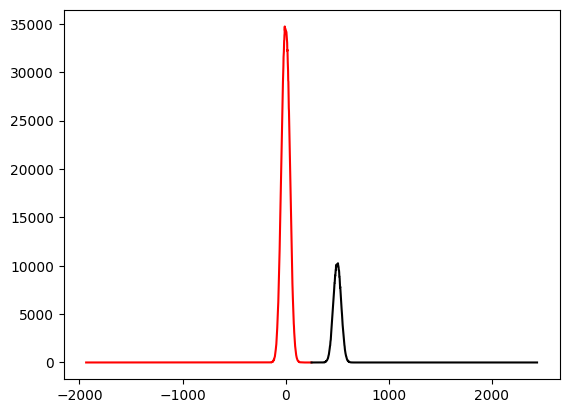

In [31]:
vel_0=11.8
atom_n , index , expand=  50 , 13 , 0 
emit = 1
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],'r')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],'k')

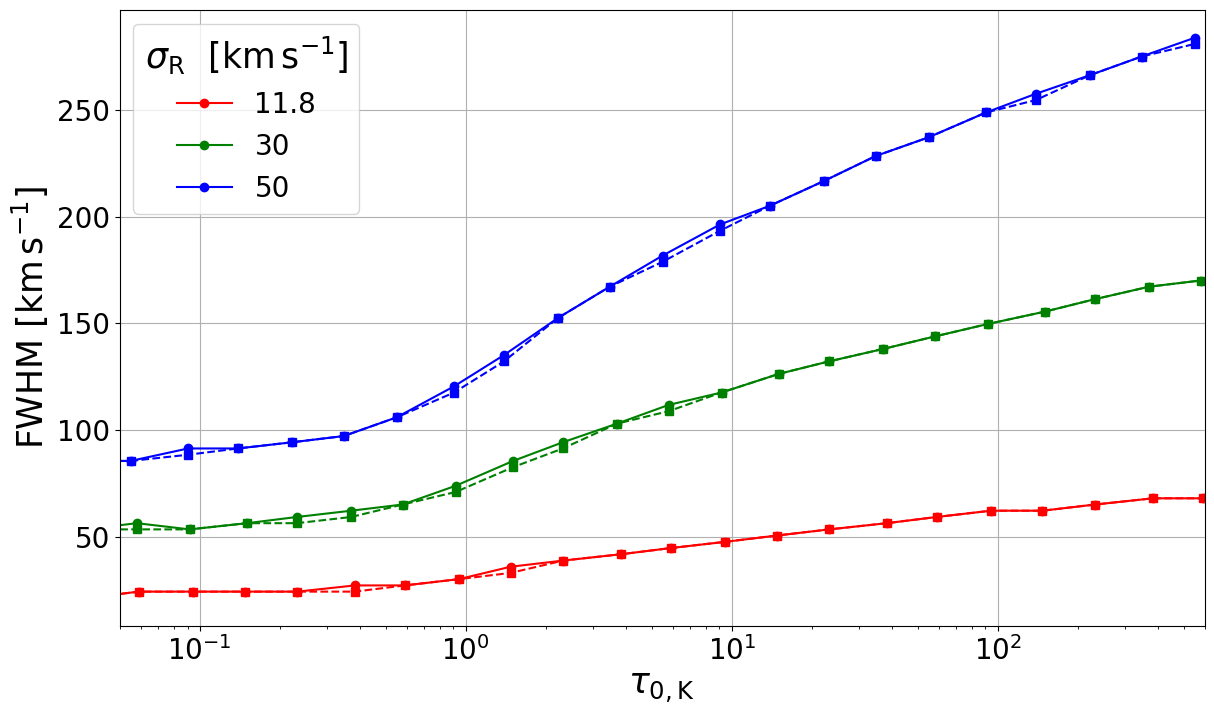

In [32]:
import math
fig= plt.figure(1,figsize=(14,8))
vel_0=11.8
atom_n , index , expand=  50 , 13 , 0 
emit = 1

vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0, (K_FWHM) ,'ro-',markersize=6,label=f'{11.8}')




vel = 30
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),K_FWHM   ,'go-',markersize=6,label=f'{vel}')


vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    # print(vel)
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),K_FWHM  ,'bo-',markersize=6,label=f'{vel}')





vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0, (K_FWHM) ,'rs--',markersize=6)

# vel = 30
# blue_K = np.zeros(len(total_N_c))
# red_K = np.copy(blue_K)
# blue_H = np.copy(blue_K)
# red_H = np.copy(blue_K)

# K_FWHM = np.copy(blue_K)
# H_FWHM = np.copy(blue_K)
# T_FWHM = np.copy(blue_K)
# for ii, N_civ in enumerate(total_N_c):
#     index = math.floor(math.log10(N_civ))
#     atom_n = int(N_civ/ 10**index * 10)
#     if vel == 11.8:
#         vel_k = 118
#     else : vel_k = vel
#     K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
#     H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

# fig = plt.figure(1,figsize=(10,5))



# plt.plot(tau_0/(vel/vel_0),K_FWHM  ,'bs-',label=f'{vel} km/s')




vel = 30
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),K_FWHM   ,'gs--',markersize=6)


vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    # print(vel)
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),K_FWHM  ,'bs--',markersize=6)









plt.xscale('log')
# plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
# plt.axhline(y=emit*2*np.sqrt(2*np.log(2)),xmin=0,xmax=1,linestyle='dashdot',color='k')

plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM}~[\rm km\,s^{-1}]$',fontsize=25)



# plt.axhline(y=100*2*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='dashdot',color='b')
# plt.axhline(y=50*2*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='dashdot',color='g')
# plt.axhline(y=11.8*2*np.sqrt(np.log(2)),xmin=0,xmax=1,linestyle='dashdot',color='r')
plt.legend(fontsize=20,ncol=1,title=f'$\sigma_{{\\rm R}} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.05,6e2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0.5,5)
plt.grid(True)
# plt.legend(loc='upper left',fontsize = 20,ncol=2,title = r'$\sigma_R [\rm km \, s^{-1}]$',title_fontsize=20)

# plt.ylim(0,500)


# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_emit_50_various_random.pdf',bbox_inches='tight')

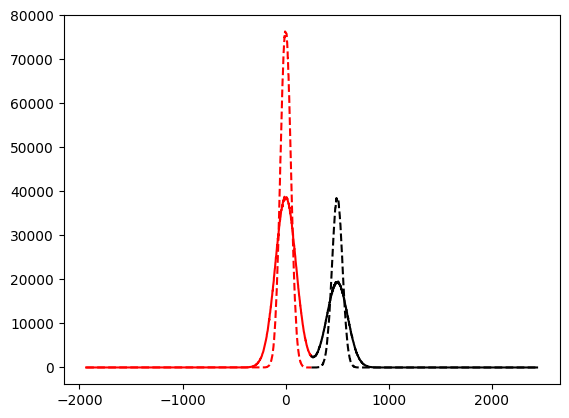

In [33]:
vel_0=11.8
atom_n , index , expand=  50 , 12 , 0 
emit = 100

plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],'r')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],'k')

emit = 50

plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],'r--')
plt.plot(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],'k--')



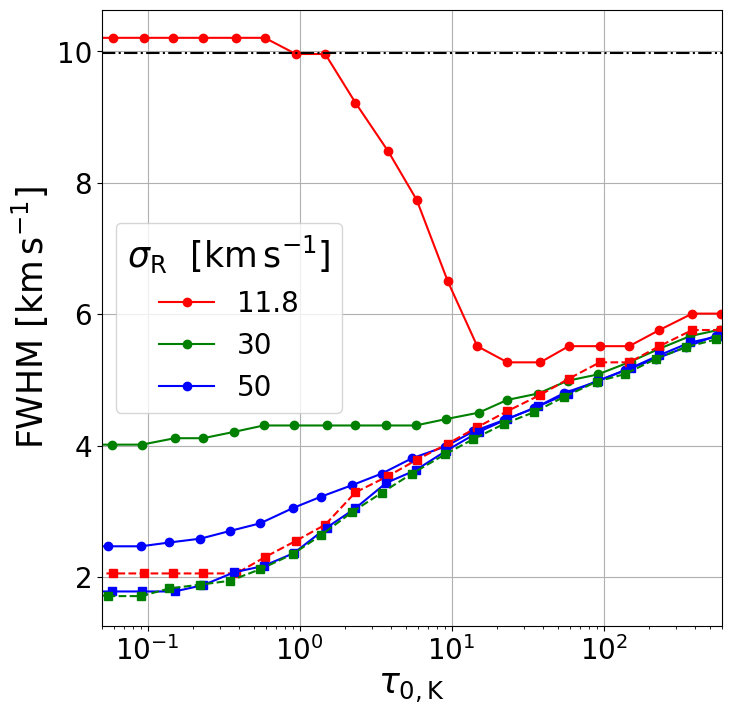

In [34]:
import math
fig= plt.figure(1,figsize=(8,8))
vel_0=11.8
atom_n , index , expand=  50 , 13 , 0 
emit = 50

vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0, (K_FWHM)/11.8,'ro-',markersize=6,label=f'{11.8}')




vel = 30
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),(K_FWHM)/vel ,'go-',markersize=6,label=f'{vel}')


vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    # print(vel)
    K_FWHM[ii] = finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'tot_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),(K_FWHM)/vel ,'bo-',markersize=6,label=f'{vel}')





vel = 11.8
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0, (K_FWHM)/vel,'rs--',markersize=6)

vel = 30
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0/(vel/vel_0),K_FWHM/vel  ,'bs-')




vel = 50
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    if vel == 11.8:
        vel_k = 118
    else : vel_k = vel
    K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



plt.plot(tau_0/(vel/vel_0),(K_FWHM)/vel   ,'gs--',markersize=6)


# vel = 100
# import math
# blue_K = np.zeros(len(total_N_c))
# red_K = np.copy(blue_K)
# blue_H = np.copy(blue_K)
# red_H = np.copy(blue_K)

# K_FWHM = np.copy(blue_K)
# H_FWHM = np.copy(blue_K)
# T_FWHM = np.copy(blue_K)
# for ii, N_civ in enumerate(total_N_c):
#     index = math.floor(math.log10(N_civ))
#     atom_n = int(N_civ/ 10**index * 10)
#     if vel == 11.8:
#         vel_k = 118
#     else : vel_k = vel
#     # print(vel)
#     K_FWHM[ii] = finding_FWHM_K(globals()[f'halo_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_K)
#     H_FWHM[ii]  = finding_FWHM_H(globals()[f'halo_vx_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'halo_vy_H_{atom_n}_{index}_{expand}_{vel_k}_{emit}'],V_H) 



# plt.plot(tau_0/(vel/vel_0),(K_FWHM)/vel/(np.sqrt(2*np.log(2))) ,'bs--',markersize=6)









plt.xscale('log')
# plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
# plt.axhline(y=emit*2*np.sqrt(2*np.log(2)),xmin=0,xmax=1,linestyle='dashdot',color='k')

plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM}~[\rm km\,s^{-1}]$',fontsize=25)


plt.axhline(y=emit*2*np.sqrt(2*np.log(2)) / 11.8,xmin=0,xmax=1,linestyle='dashdot',color='k')


plt.legend(fontsize=20,ncol=1,title=f'$\sigma_{{\\rm R}} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.05,6e2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim(0.5,5)
plt.grid(True)
# plt.legend(loc='upper left',fontsize = 20,ncol=2,title = r'$\sigma_R [\rm km \, s^{-1}]$',title_fontsize=20)

# plt.ylim(0,500)


# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_emit_50_various_random.pdf',bbox_inches='tight')

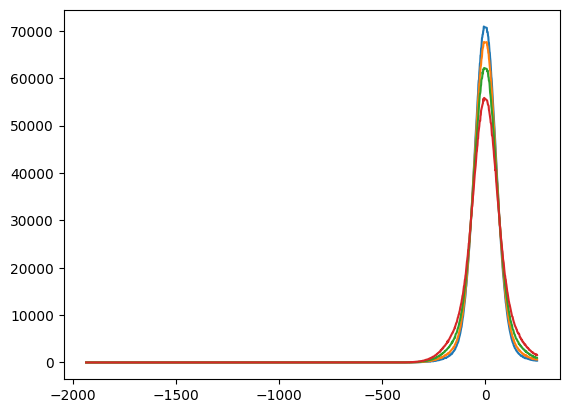

In [35]:
atom_n = 50
index= 13 
expand =0
vel_k = 150
emit = 50

plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])

atom_n = 79
index= 13
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])

atom_n = 13
index= 14
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])

atom_n = 20
index= 14
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'])

50km/s 에서  tau ~1 근처에서 살짝 증가 감소 하는 이유 -> 더블픽이 보이면서 살짝 감소 (gaussian이랑 거의 비슷한데 더블픽 때문에 살짝 증가해보임). 그리고 점점 이 dobule peak이 뚜렷해 지는 과정에서 다시 감소하면서, 
이 double peak이 뚜렷해지면서 점점 FWHM이 이 증가함. 

그리고  intrinsic gaussian distribution  > Random motion 인 경우, 



(-250.0, 300.0)

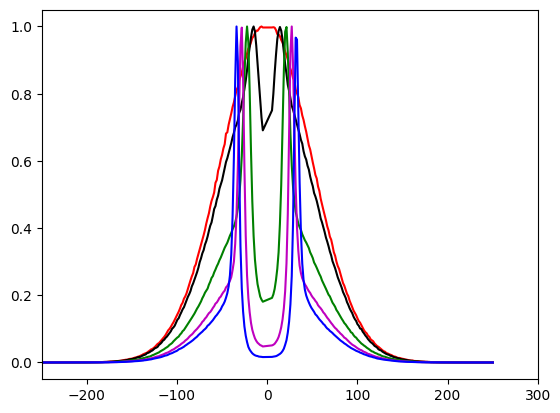

In [36]:
atom_n , index , expand = 79,15,0 
emit = 50


vel_k = 118


index = 12
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'r')

index = 13
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'k')


index = 14
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'g')

index = 15
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'m')


index = 16
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'b')


plt.xlim(-250,300)

Tau < 1 보다 낮으면, 
FWHM이 ~ sigma 2.35 랑 변화가 똑같음 : Gaussian 형태이기 때문에. 
우리가 이 그림을 보려는 이유는, double peak이 나타 날때, (k and H line에서), 그 bordening 효과가 얼마나 나는지 보기 위함. 
즉, double peak이 나타나기 전에는 bordening 효과는 x 

Tau > 1 보다 커지면,
이제 double structure을 보이기 때문에, scattering medium 의 random motion 에 의한 bordening 효과가 나타난다. 

하지만 monochromatic source에서 이 효과는 random motion velocity에 상관 없이 bordening 효과가 같다. (-> bordening 효과는 random motion 보다 optical depth 에 의존성)



In [37]:
def x_finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return min(x_f_1) , max(x_f_1)


def x_finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return  min(x_f_1) , max(x_f_1)


1.0028984917982813


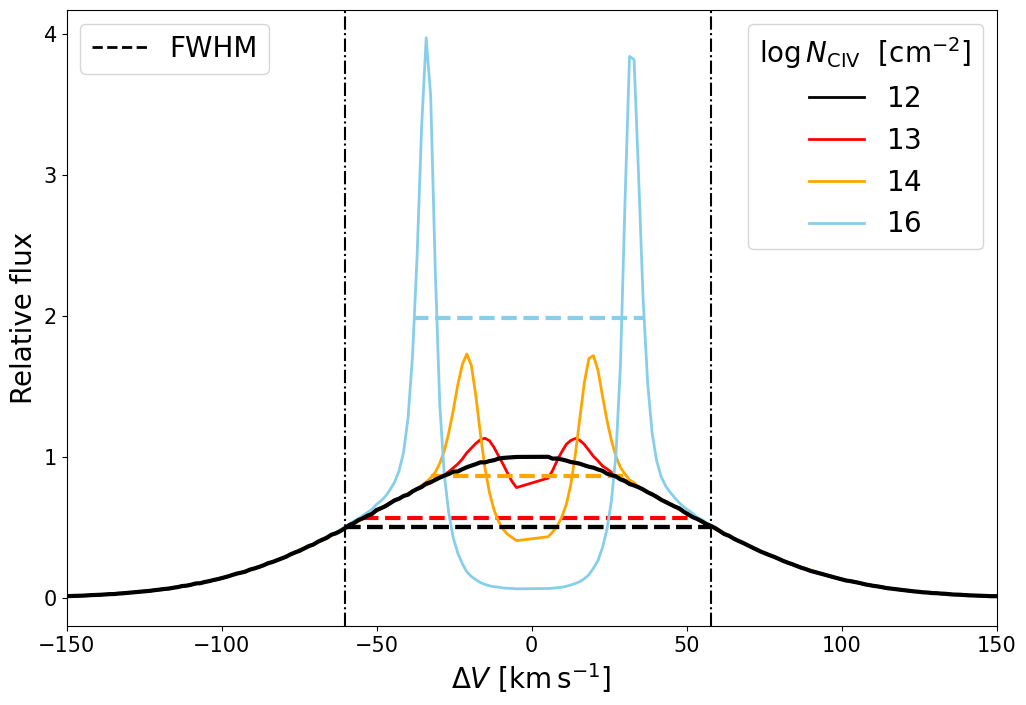

In [38]:
fig = plt.figure(1,figsize=(12,8))

expand =0 
emit = 50


vel_k = 118

# plt.axvline(x=45,ymin=0,ymax=5)
atom_n = 13
index = 12
color = 'k'
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=2,label=f'${index}$')
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)

plt.axvline(x=x_min,ymin=0,ymax=10,linestyle='dashdot',color='k')
plt.axvline(x=x_max,ymin=0,ymax=10,linestyle='dashdot',color='k')
print( (x_max-x_min)/ (emit*2*np.sqrt(2*np.log(2))))
atom_n = 79
index = 13
color = 'r'
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=2,label=f'$ {index}$')
# plt.axhline(y =globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2 , xmin=0,xmax=1 )
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)

atom_n = 50
index = 14
color = 'orange'
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=2,label=f'${index}$')
# plt.axhline(y =globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2 , xmin=0,xmax=1 )
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)
# index = 15
# # normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
# plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,'m')

atom_n = 79
index = 16
color = 'skyblue'
# normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=2,label=f'$ {index}$')
# plt.axhline(y =globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2 , xmin=0,xmax=1 )
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)

atom_n = 13
index = 12
color = 'k'
normal_f = globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()
plt.plot(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}']/normal_f ,color = color,lw=3)
x_min, x_max = x_finding_FWHM_K(globals()[f'tot_vx_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'] ,globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'], 0)
plt.hlines(y=globals()[f'tot_vy_K_{atom_n}_{index}_{expand}_{vel_k}_{emit}'].max()/normal_f/2,xmin=x_min,xmax=x_max,linestyle='--',color = color,lw=3)

plt.xlim(-150,150)




plt.legend(ncol=2,fontsize=20,title=r'$\log N_{\rm CIV}~~[\rm cm^{-2}]$',title_fontsize=20)
plt.xlabel(r'$\Delta V ~ [\rm km\,s^{-1}]$',fontsize=20)
plt.ylabel('Relative flux',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks([0.0,1.0,2.0,3.0,4.0],fontsize=15)
# plt.xtick


handles, labels = plt.gca().get_legend_handles_labels()
ff_t = plt.legend(handles[::], labels[::], ncol=1,fontsize=20,loc='upper right',title=r'$\log N_{\rm CIV}~~[\rm cm^{-2}]$',title_fontsize=20)

# Add the first legend back to the plot
plt.gca().add_artist(ff_t )
import matplotlib.lines as mlines
outflow_line = mlines.Line2D([], [], color='black', linestyle='--',lw=2,label='FWHM')


# # Add a second legend
second_legend = plt.legend(handles=[outflow_line], loc='upper left', fontsize=20)
# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM_low_and_high_emit_50.pdf',bbox_inches='tight')